In [570]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [571]:
dist1 = pd.read_csv("dist1.txt",delimiter="\t", header=None)
dist2 = pd.read_csv("dist2.txt",delimiter="\t", header=None)
dist3 = pd.read_csv("dist3.txt",delimiter="\t", header=None)
dist4 = pd.read_csv("dist4.txt",delimiter="\t", header=None)
dist5 = pd.read_csv("dist5.txt",delimiter="\t", header=None)
dist6 = pd.read_csv("dist6.txt",delimiter="\t", header=None)
dist7 = pd.read_csv("dist7.txt",delimiter="\t", header=None)
dist8 = pd.read_csv("dist8.txt",delimiter="\t", header=None)
dist9 = pd.read_csv("dist9.txt",delimiter="\t", header=None)
dist10 = pd.read_csv("dist10.txt",delimiter="\t", header=None)
dist11 = pd.read_csv("dist11.txt",delimiter="\t", header=None)
dist12 = pd.read_csv("dist12.txt",delimiter="\t", header=None)
dist13 = pd.read_csv("dist13.txt",delimiter="\t", header=None)
dist14 = pd.read_csv("dist14.txt",delimiter="\t", header=None)
dist15 = pd.read_csv("dist15.txt",delimiter="\t", header=None)
dist16 = pd.read_csv("dist16.txt",delimiter="\t", header=None)
dist17 = pd.read_csv("dist17.txt",delimiter="\t", header=None)
dist18 = pd.read_csv("dist18.txt",delimiter="\t", header=None)
dist19 = pd.read_csv("dist19.txt",delimiter="\t", header=None)
dist20 = pd.read_csv("dist20.txt",delimiter="\t", header=None)
dist21 = pd.read_csv("dist21.txt",delimiter="\t", header=None)
dist22 = pd.read_csv("dist22.txt",delimiter="\t", header=None)


dist1 = pd.DataFrame.to_numpy(dist1[0])
dist2 = pd.DataFrame.to_numpy(dist2[0])
dist3 = pd.DataFrame.to_numpy(dist3[0])
dist4 = pd.DataFrame.to_numpy(dist4[0])
dist5 = pd.DataFrame.to_numpy(dist5[0])
dist6 = pd.DataFrame.to_numpy(dist6[0])
dist7 = pd.DataFrame.to_numpy(dist7[0])
dist8 = pd.DataFrame.to_numpy(dist8[0])
dist9 = pd.DataFrame.to_numpy(dist9[0])
dist10 = pd.DataFrame.to_numpy(dist10[0])
dist11 = pd.DataFrame.to_numpy(dist11[0])
dist12 = pd.DataFrame.to_numpy(dist12[0])
dist13 = pd.DataFrame.to_numpy(dist13[0])
dist14 = pd.DataFrame.to_numpy(dist14[0])
dist15 = pd.DataFrame.to_numpy(dist15[0])
dist16 = pd.DataFrame.to_numpy(dist16[0])
dist17 = pd.DataFrame.to_numpy(dist17[0])
dist18 = pd.DataFrame.to_numpy(dist18[0])
dist19 = pd.DataFrame.to_numpy(dist19[0])
dist20 = pd.DataFrame.to_numpy(dist20[0])
dist21 = pd.DataFrame.to_numpy(dist21[0])
dist22 = pd.DataFrame.to_numpy(dist22[0])

In [572]:
def cleaning_func_5():

    # read data
    data_2021 = pd.read_json('2021.json')
    data_2023 = pd.read_csv('2023.csv')

    # clean district in 2021
    data_2021['District'] = data_2021['district'].str.split('(', 0).str[0]
    data_2021['District'] = data_2021['District'].str.split('-').str[0]
    data_2021['District'] = data_2021['District'].str.replace('\d+', '')

    # fliter sale type
    data_2021 = data_2021[data_2021['sub_category'] == 'apartment-sell']

    # drop unwanted 2021 columns
    data_2021.drop(['rent', 'title', 'token', 'business_type', 'credit', 'balcony', 'agency', 'category', 'sub_category', 'location', 'floor', 'district'], axis=1, inplace=True)
    
    # rename 2021 columns
    data_2021.columns = ['Price', 'Area', 'Construction', 'Room', 'Elevator', 'Parking', 'Warehouse', 'Neighbourhood']
    
    # clean 2023 price
    persian_number_pattern = r'۰|۱|۲|۳|۴|۵|۶|۷|۸|۹'
    data_2023['Price'] = data_2023['Price'].str.extract(r'(\S+)\s+تومان')
    data_2023['Price'] = data_2023['Price'].str.replace(persian_number_pattern, lambda x: str(ord(x.group()) - ord('۰')))
    data_2023['Price'] = data_2023['Price'].str.replace('٬', '')
    data_2023['Price'] = data_2023['Price'].astype('float')
    

    # build 2023 district
    data_2023['Neighbourhood'] = data_2023['Address'].str.split('،').str[1]
    data_2023['Neighbourhood'] = data_2023['Neighbourhood'].str.split('(', 0).str[0]
    data_2023['Neighbourhood'] = data_2023['Neighbourhood'].str.split('-').str[0]
    data_2023['Neighbourhood'] = data_2023['Neighbourhood'].str.replace('\d+', '')
    data_2023['Neighbourhood'] = data_2023['Neighbourhood'].str.lstrip()

    data_2023.drop(['Address'], axis=1, inplace=True)
    

    # delete null values 
    data_2021.dropna(subset=['Price', 'Area', 'Construction', 'Room'], inplace=True)
    data_2023.dropna(subset=['Price'], inplace=True)


    # fix data types
    data_2023['Area'] = data_2023['Area'].astype('int64')
    data_2023['Room'] = data_2023['Room'].astype('int64')
    data_2023['Construction'] = data_2023['Construction'].astype('int64')

    data_2021['Area'] = data_2021['Area'].astype('int64')
    data_2021['Room'] = data_2021['Room'].astype('int64')
    data_2021['Construction'] = data_2021['Construction'].astype('int64')

    # add ppm column
    
    data_2023['ppm'] = data_2023['Price']/data_2023['Area']
    data_2021['ppm'] = data_2021['Price']/data_2021['Area']


    
    # delete outliers
        # Area
            # 2021
    z_Area_2021 = abs(stats.zscore(data_2021['Area']))
    data_2021['Area'] = data_2021['Area'][z_Area_2021<2]
            # 2023
    z_Area_2023 = abs(stats.zscore(data_2023['Area']))
    data_2023['Area'] = data_2023['Area'][z_Area_2023<2]

        # Price
            # 2021
    for x in data_2021['Neighbourhood'].unique():
            qmax = data_2021[data_2021['Neighbourhood']==x]['ppm'].quantile(0.97)
            qmin = data_2021[data_2021['Neighbourhood']==x]['ppm'].quantile(0.03)
            data_2021[data_2021['Neighbourhood']==x] = data_2021[data_2021['Neighbourhood']==x][data_2021[data_2021['Neighbourhood']==x]['ppm']<qmax]
            data_2021[data_2021['Neighbourhood']==x] = data_2021[data_2021['Neighbourhood']==x][data_2021[data_2021['Neighbourhood']==x]['ppm']>qmin]

              # 2023
    for x in data_2023['Neighbourhood'].unique():
            qmax = data_2023[data_2023['Neighbourhood']==x]['ppm'].quantile(0.93)
            qmin = data_2023[data_2023['Neighbourhood']==x]['ppm'].quantile(0.03)
            data_2023[data_2023['Neighbourhood']==x] = data_2023[data_2023['Neighbourhood']==x][data_2023[data_2023['Neighbourhood']==x]['ppm']<qmax]
            data_2023[data_2023['Neighbourhood']==x] = data_2023[data_2023['Neighbourhood']==x][data_2023[data_2023['Neighbourhood']==x]['ppm']>qmin]


    data_2023.dropna(subset=['Area', 'Price'], inplace=True)
    data_2021.dropna(subset=['Area'], inplace=True)

    # substituting anomolies
    data_2023['Elevator'][data_2023['Elevator']=='True'] = True
    data_2023['Elevator'][data_2023['Elevator']=='False'] = False
    data_2023['Elevator'][data_2023['Elevator']=='Elevator'] = True

    data_2021['Elevator'][data_2021['Elevator']=='دارد'] = True
    data_2021['Elevator'][data_2021['Elevator']=='ندارد'] = False


    data_2023['Warehouse'][data_2023['Warehouse']=='True'] = True
    data_2023['Warehouse'][data_2023['Warehouse']=='False'] = False
    data_2023['Warehouse'][data_2023['Warehouse']=='Warehouse'] = True

    data_2021['Warehouse'][data_2021['Warehouse']=='دارد'] = True
    data_2021['Warehouse'][data_2021['Warehouse']=='ندارد'] = False


    data_2023['Parking'][data_2023['Parking']=='True'] = True
    data_2023['Parking'][data_2023['Parking']=='False'] = False
    data_2023['Parking'][data_2023['Parking']=='Parking'] = True

    data_2021['Parking'][data_2021['Parking']=='دارد'] = True
    data_2021['Parking'][data_2021['Parking']=='ندارد'] = False


    # data_2021['Elevator'].fillna(value='no_data', inplace=True)
    # data_2021['Parking'].fillna(value='no_data', inplace=True)
    # data_2021['Warehouse'].fillna(value='no_data', inplace=True)

    data_2021.dropna(subset=['Parking', 'Warehouse', 'Elevator'], inplace=True)

    # data_2021['NullElev'] = data_2021['Elevator'].apply(lambda x: 1 if x=='no_data' else 0)
    # data_2023['NullElev'] = data_2023['Elevator'].apply(lambda x: 1 if x=='no_data' else 0)
    
    data_2021.dropna(subset=['Price', 'Area', 'Construction', 'Room'], inplace=True)
    data_2023.dropna(subset=['Price'], inplace=True)


    data_2023['District'] = None
    data_2021['District'] = None

    dist_arrays = [dist1, dist2, dist3, dist4, dist5, dist6, dist7, dist8, dist9, dist10, 
    dist11, dist12, dist13, dist14, dist15, dist16, dist17, dist18, dist19, dist20, dist21, dist22]

    for i, dist_array in enumerate(dist_arrays, start=1):
        mask1 = data_2021['Neighbourhood'].str.contains('|'.join(dist_array))
        mask3 = data_2023['Neighbourhood'].str.contains('|'.join(dist_array))
        data_2023.loc[mask3, 'District'] = f'd{i}'
        data_2021.loc[mask1, 'District'] = f'd{i}'
    
    # out_lier_2023 = []
    # out_lier_2021 = []
    
    # for x in data_2023['Neighbourhood'].unique():
    #     n = len(data_2023[data_2023['Neighbourhood']==x])
    #     if n<10:
    #         out_lier_2023.append(x)

    # for y in data_2021['Neighbourhood'].unique():
    #     n = len(data_2021[data_2021['Neighbourhood']==y])
    #     if n<10:
    #         out_lier_2021.append(y)


    # data_2021['Neighbourhood'][data_2021['District'].isna()] = 'no_neigh'
    # data_2023['Neighbourhood'][data_2023['District'].isna()] = 'no_neigh'
    data_2023['District'].fillna(value='no_dist', inplace=True)
    data_2021['District'].fillna(value='no_dist', inplace=True)

    # out_lier_2021 = [str(item) for item in out_lier_2021]
    # mask = data_2021['Neighbourhood'].str.contains('|'.join(out_lier_2021))
    # data_2021.loc[mask, 'Neighbourhood'] = 'no_neigh'

    # out_lier_2023 = [str(item) for item in out_lier_2023]
    # mask = data_2023['Neighbourhood'].str.contains('|'.join(out_lier_2023))
    # data_2023.loc[mask, 'Neighbourhood'] = 'no_neigh'

    # data_2023['NullNeigh'] = data_2023['Neighbourhood'].apply(lambda x: 1 if x=='no_neigh' else 0)
    # data_2021['NullNeigh'] = data_2021['Neighbourhood'].apply(lambda x: 1 if x=='no_neigh' else 0)
    # add a Price per meter column


    # keep wanted 2021 district values

    data_2021 = data_2021[data_2021['Neighbourhood'].isin(data_2023['Neighbourhood'].unique())]
    data_2023 = data_2023[data_2023['Neighbourhood'].isin(data_2021['Neighbourhood'].unique())]

    return data_2021, data_2023

In [573]:
data_2021, data_2023 = cleaning_func_5()

c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-572-99d5c796851f>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Elevator'][data_2023['Elevator']=='True'] = True
<ipython-input-572-99d5c796851f>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Elevator'][data_2023['Elevator']=='False'] = False
<ipython-input-572-99d5c796851f>:91: SettingWithCopyWarning: 
A value is trying to be set on 

(array([17666., 36837., 22835., 11212.,  5870.,  2554.,  1084.,   570.,
          167.,    56.]),
 array([3.47142857e+06, 1.99992857e+07, 3.65271429e+07, 5.30550000e+07,
        6.95828571e+07, 8.61107143e+07, 1.02638571e+08, 1.19166429e+08,
        1.35694286e+08, 1.52222143e+08, 1.68750000e+08]),
 <a list of 10 Patch objects>)

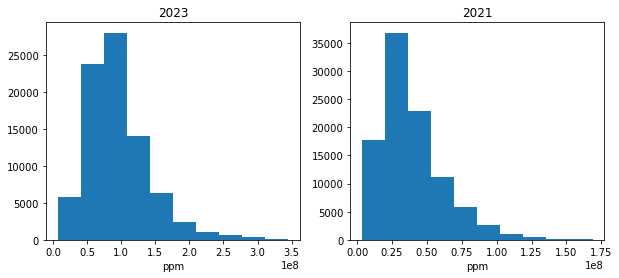

In [574]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].set(xlabel = 'ppm', title='2023');
ax[0].hist(data_2023['ppm'])

ax[1].set(xlabel = 'ppm', title='2021');
ax[1].hist(data_2021['ppm'])

In [575]:
data_2023.head(2)

,Area,Construction,Room,Warehouse,Parking,Elevator,Price,Neighbourhood,ppm,District
0,153.0,1393.0,3.0,True,True,True,1.836000e+10,درکه,1.200000e+08,d1
1,418.0,1382.0,4.0,True,True,True,1.300000e+11,زعفرانیه,3.110048e+08,d1


(array([17666., 36837., 22835., 11212.,  5870.,  2554.,  1084.,   570.,
          167.,    56.]),
 array([3.47142857e+06, 1.99992857e+07, 3.65271429e+07, 5.30550000e+07,
        6.95828571e+07, 8.61107143e+07, 1.02638571e+08, 1.19166429e+08,
        1.35694286e+08, 1.52222143e+08, 1.68750000e+08]),
 <a list of 10 Patch objects>)

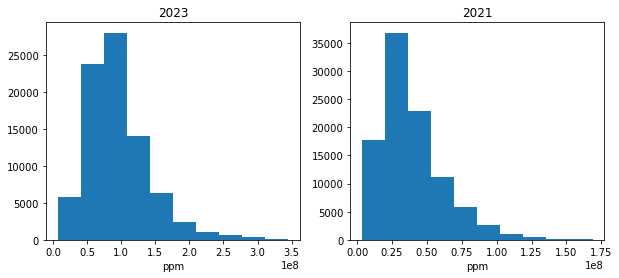

In [576]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].set(xlabel = 'ppm', title='2023');
ax[0].hist(data_2023['ppm'])

ax[1].set(xlabel = 'ppm', title='2021');
ax[1].hist(data_2021['ppm'])

(array([  234.,     0., 24531.,     0.,     0., 51388.,     0., 20757.,
            0.,  1941.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

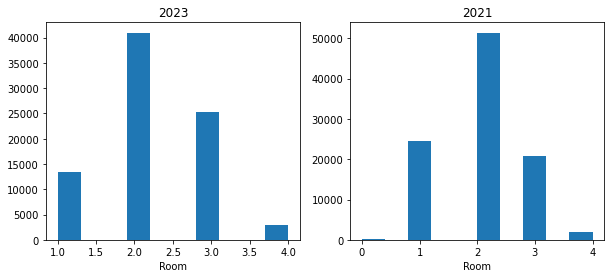

In [577]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].set(xlabel = 'Room', title='2023');
ax[0].hist(data_2023['Room'])

ax[1].set(xlabel = 'Room', title='2021');
ax[1].hist(data_2021['Room'])

(array([ 5912., 46444., 26996., 12337.,  3794.,  1622.,   823.,   576.,
          230.,   117.]),
 array([  6. ,  47.1,  88.2, 129.3, 170.4, 211.5, 252.6, 293.7, 334.8,
        375.9, 417. ]),
 <a list of 10 Patch objects>)

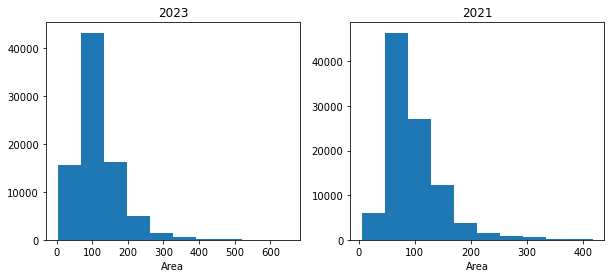

In [578]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].set(xlabel = 'Area', title='2023');
ax[0].hist(data_2023['Area'])

ax[1].set(xlabel = 'Area', title='2021');
ax[1].hist(data_2021['Area'])

(array([ 1695.,  1160.,  1360.,  6727., 11343., 13950., 11268., 10050.,
        14824., 26474.]),
 array([1370. , 1372.9, 1375.8, 1378.7, 1381.6, 1384.5, 1387.4, 1390.3,
        1393.2, 1396.1, 1399. ]),
 <a list of 10 Patch objects>)

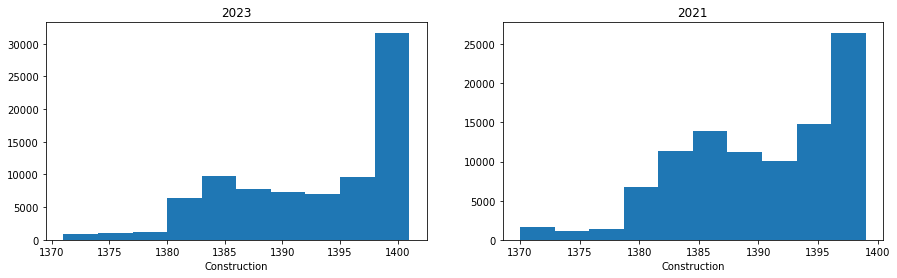

In [579]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].set(xlabel = 'Construction', title='2023');
ax[0].hist(data_2023['Construction'])

ax[1].set(xlabel = 'Construction', title='2021');
ax[1].hist(data_2021['Construction'])

In [580]:
# Area bucket

data_2021['Area_cat'] = 'large'
data_2021['Area_cat'][data_2021['Area']<120] = 'medium_large'
data_2021['Area_cat'][data_2021['Area']<90] = 'medium_small'
data_2021['Area_cat'][data_2021['Area']<65] = 'small'

data_2023['Area_cat'] = 'large'
data_2023['Area_cat'][data_2023['Area']<120] = 'medium_large'
data_2023['Area_cat'][data_2023['Area']<90] = 'medium_small'
data_2023['Area_cat'][data_2023['Area']<65] = 'small'


# Year bucket 

data_2021['year_cat'] = 'new'
data_2021['year_cat'][data_2021['Construction']<93] = 'medium'
data_2021['year_cat'][data_2021['Construction']<85] = 'old'


data_2023['year_cat'] = 'new'
data_2023['year_cat'][data_2023['Construction']<93] = 'medium'
data_2023['year_cat'][data_2023['Construction']<85] = 'old'

<ipython-input-580-aea1d7ff6f20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Area_cat'][data_2021['Area']<120] = 'medium_large'
<ipython-input-580-aea1d7ff6f20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Area_cat'][data_2021['Area']<90] = 'medium_small'
<ipython-input-580-aea1d7ff6f20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Area_cat'][data_2021['Area']<65] = 'small'
<ipython-input-5

In [581]:
data_2021.head(2)

,Price,Area,Construction,Room,Elevator,Parking,Warehouse,Neighbourhood,ppm,District,Area_cat,year_cat
7,1.400000e+09,53.0,1394.0,1.0,True,True,True,نازی‌آباد,2.641509e+07,d16,small,new
8,1.580000e+09,70.0,1385.0,2.0,True,True,True,آذربایجان,2.257143e+07,d10,medium_small,new


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

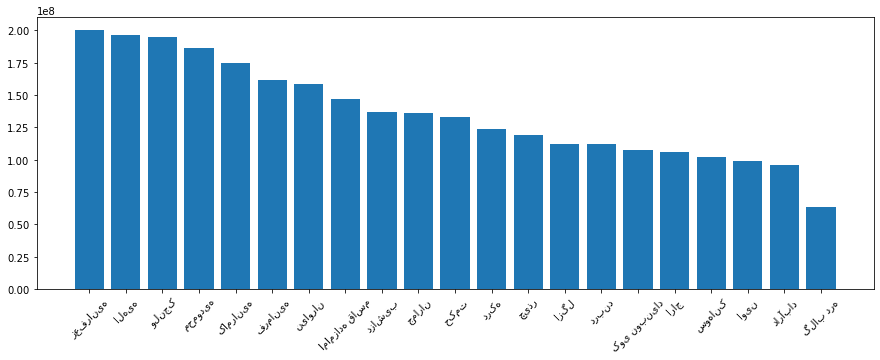

In [582]:
# visualizing price per meter in each district 



groupedby = data_2023[data_2023['District'] == 'd1'].groupby('Neighbourhood')['ppm'].mean()
groupedby = pd.DataFrame({'pmm':groupedby}).reset_index().sort_values(by='pmm', ascending=False)


plt.figure(figsize=(15,5))
plt.bar(groupedby['Neighbourhood'], groupedby['pmm'])
plt.xticks(rotation=45)

In [583]:
data_2023.head(2)

,Area,Construction,Room,Warehouse,Parking,Elevator,Price,Neighbourhood,ppm,District,Area_cat,year_cat
0,153.0,1393.0,3.0,True,True,True,1.836000e+10,درکه,1.200000e+08,d1,large,new
1,418.0,1382.0,4.0,True,True,True,1.300000e+11,زعفرانیه,3.110048e+08,d1,large,new


In [584]:
# encoding 
coded_data_2023 = pd.get_dummies(data_2023[['Area', 'Construction', 'Neighbourhood', 'District']])
coded_data_2021 = pd.get_dummies(data_2021[['Area', 'Construction', 'Neighbourhood', 'District']])

# train, test
X3_train, X3_test, y3_train, y3_test = train_test_split(coded_data_2023, data_2023['ppm'], test_size=0.2, random_state=10)

# validation
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.25, random_state=1)

(array([ 74.,  53.,  77.,  98., 158., 171., 169.,  65.,  39.,  24.]),
 array([13076923.07692308, 13979757.08502024, 14882591.09311741,
        15785425.10121457, 16688259.10931174, 17591093.11740891,
        18493927.12550607, 19396761.13360324, 20299595.14170041,
        21202429.14979757, 22105263.15789474]),
 <a list of 10 Patch objects>)

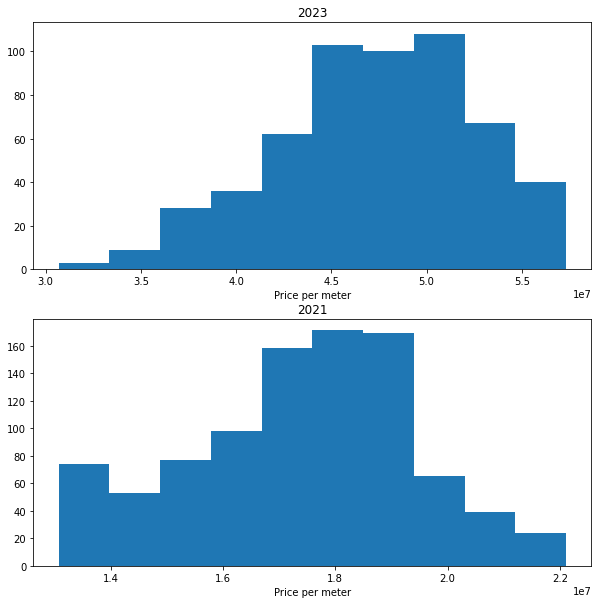

In [585]:
x = data_2023['Neighbourhood'].sample().iloc[0]

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].set(title='2023', xlabel='Price per meter')
ax[1].set(title='2021', xlabel='Price per meter')


ax[0].hist(data_2023[data_2023['Neighbourhood']== x]['ppm'])
ax[1].hist(data_2021[data_2021['Neighbourhood']== x]['ppm'])



In [586]:
rfr3 = RandomForestRegressor(max_depth = 10, min_samples_split = 5, random_state=0)


rfr3.fit(X3_train, y3_train)
y3_val_pred = rfr3.predict(X3_val)
y3_train_pred = rfr3.predict(X3_train)
y3_test_pred = rfr3.predict(X3_test)

print(r2_score(y3_train, y3_train_pred), r2_score(y3_val, y3_val_pred), r2_score(y3_test, y3_test_pred))
print(msle(y3_train, y3_train_pred), msle(y3_val, y3_val_pred), msle(y3_test, y3_test_pred))

0.816348412411394 0.7960426351508211 0.7924331732861887
0.07975811801553408 0.07971568793415773 0.08162755236441546


## Predict Profit

In [587]:
predict_2021 = rfr3.predict(coded_data_2021)

In [588]:
print(len(predict_2021), len(coded_data_2021))

98851 98851


In [589]:
profit_2021 = (predict_2021 - data_2021['ppm'])/data_2021['ppm']

In [590]:
data_2021['Profit'] = profit_2021
data_2021['ppm_after'] = predict_2021
data_2021 = data_2021.sort_values(by='Profit', ascending=False)

grouped_2021 = data_2021.groupby(['Neighbourhood', 'Area_cat', 'year_cat'], as_index=False)['Profit', 'ppm', 'ppm_after'].mean().sort_values(by='Profit', ascending=False)

<ipython-input-590-db4bc5ee910f>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_2021 = data_2021.groupby(['Neighbourhood', 'Area_cat', 'year_cat'], as_index=False)['Profit', 'ppm', 'ppm_after'].mean().sort_values(by='Profit', ascending=False)


In [591]:
grouped_2021

,Neighbourhood,Area_cat,year_cat,Profit,ppm,ppm_after
1035,نعمت‌آباد,large,new,18.439643,5.909091e+06,1.148706e+08
341,حسن‌آباد,large,new,11.236191,7.500000e+06,9.177143e+07
634,شریف‌آباد,large,new,10.513239,7.440852e+06,8.503932e+07
636,شریف‌آباد,medium_small,new,10.155967,5.392258e+06,5.683813e+07
357,حصارک,small,new,9.981047,9.950938e+06,8.846668e+07
...,...,...,...,...,...,...
449,دریا,medium_large,new,-0.035737,6.041576e+07,5.704131e+07
10,آجودانیه,medium_small,new,-0.069505,6.172695e+07,5.683813e+07
740,شهرک پاسداران,large,new,-0.099025,6.500000e+07,5.856338e+07
9,آجودانیه,medium_large,new,-0.108211,6.495451e+07,5.689442e+07


In [592]:
inertias_u = []
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k)
	kmeanModel.fit(grouped_2021[['Profit']])
	inertias_u.append(kmeanModel.inertia_)


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0.5, 1.0, 'The Elbow Method using Inertia')

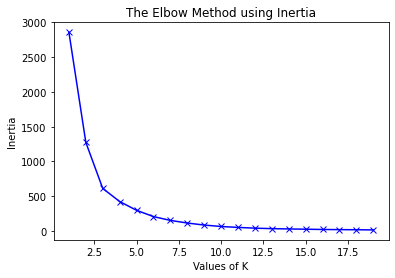

In [593]:
plt.plot(K, inertias_u, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

In [493]:
pd.merge(data_2023, grouped_2021, on=['Area_cat', 'year_cat', 'Neighbourhood'], how='left')

,Area,Construction,Room,Warehouse,Parking,Elevator,Price,Neighbourhood,ppm_x,District,Area_cat,year_cat,Profit,ppm_y,ppm_after,Cluster
0,153.0,1393.0,3.0,True,True,True,1.836000e+10,درکه,1.200000e+08,d1,large,new,1.438997,5.991170e+07,8.699345e+07,5.0
1,418.0,1382.0,4.0,True,True,True,1.300000e+11,زعفرانیه,3.110048e+08,d1,large,new,0.994205,9.484987e+07,8.653797e+07,2.0
2,57.0,1385.0,2.0,False,False,True,2.600000e+09,جابری,4.561404e+07,d14,small,new,2.645054,1.559322e+07,5.683813e+07,0.0
3,193.0,1371.0,3.0,False,False,True,2.300000e+10,فرمانیه,1.191710e+08,d1,large,new,0.924854,8.677447e+07,8.613251e+07,2.0
4,62.0,1401.0,1.0,True,True,True,1.410000e+09,دهکده المپیک,2.274194e+07,d22,small,new,1.198460,2.673092e+07,9.194376e+07,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82535,181.0,1393.0,3.0,True,True,True,1.800000e+10,جردن,9.944751e+07,d3,large,new,0.942929,5.555805e+07,8.796207e+07,2.0
82536,121.0,1400.0,3.0,True,True,True,1.380000e+10,اباذر,1.140496e+08,d5,large,new,1.233784,4.513572e+07,8.599578e+07,2.0
82537,140.0,1400.0,3.0,True,True,True,9.860000e+09,آبشار تهران,7.042857e+07,d12,large,new,4.453856,2.009525e+07,1.014537e+08,3.0
82538,105.0,1398.0,2.0,True,True,True,6.430000e+09,اوقاف,6.123810e+07,d4,medium_large,new,1.759159,2.581780e+07,9.681416e+07,5.0


In [608]:
kmeans = KMeans(n_clusters=5)
grouped_2021['Cluster'] = kmeans.fit_predict(grouped_2021[['Profit']])

grouped_2021

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Neighbourhood,Area_cat,year_cat,Profit,ppm,ppm_after,Cluster
1035,نعمت‌آباد,large,new,18.439643,5.909091e+06,1.148706e+08,2
341,حسن‌آباد,large,new,11.236191,7.500000e+06,9.177143e+07,2
634,شریف‌آباد,large,new,10.513239,7.440852e+06,8.503932e+07,2
636,شریف‌آباد,medium_small,new,10.155967,5.392258e+06,5.683813e+07,2
357,حصارک,small,new,9.981047,9.950938e+06,8.846668e+07,2
...,...,...,...,...,...,...,...
449,دریا,medium_large,new,-0.035737,6.041576e+07,5.704131e+07,0
10,آجودانیه,medium_small,new,-0.069505,6.172695e+07,5.683813e+07,0
740,شهرک پاسداران,large,new,-0.099025,6.500000e+07,5.856338e+07,0
9,آجودانیه,medium_large,new,-0.108211,6.495451e+07,5.689442e+07,0


In [635]:
data_2023

,Area,Construction,Room,Warehouse,Parking,Elevator,Price,Neighbourhood,ppm,District,Area_cat,year_cat
0,153.0,1393.0,3.0,True,True,True,1.836000e+10,درکه,1.200000e+08,d1,large,new
1,418.0,1382.0,4.0,True,True,True,1.300000e+11,زعفرانیه,3.110048e+08,d1,large,new
2,57.0,1385.0,2.0,False,False,True,2.600000e+09,جابری,4.561404e+07,d14,small,new
3,193.0,1371.0,3.0,False,False,True,2.300000e+10,فرمانیه,1.191710e+08,d1,large,new
4,62.0,1401.0,1.0,True,True,True,1.410000e+09,دهکده المپیک,2.274194e+07,d22,small,new
...,...,...,...,...,...,...,...,...,...,...,...,...
94031,181.0,1393.0,3.0,True,True,True,1.800000e+10,جردن,9.944751e+07,d3,large,new
94032,121.0,1400.0,3.0,True,True,True,1.380000e+10,اباذر,1.140496e+08,d5,large,new
94033,140.0,1400.0,3.0,True,True,True,9.860000e+09,آبشار تهران,7.042857e+07,d12,large,new
94034,105.0,1398.0,2.0,True,True,True,6.430000e+09,اوقاف,6.123810e+07,d4,medium_large,new


In [636]:
data_ = pd.merge(data_2023, grouped_2021.drop(['ppm'], axis=1), on=['Area_cat', 'year_cat', 'Neighbourhood'], how='left')

In [673]:
data_2021_cluster = pd.merge(data_2021, grouped_2021.drop(['ppm'], axis=1), on=['Area_cat', 'year_cat', 'Neighbourhood'], how='left')

In [699]:
data_2021_cluster['ppm_after_cluster'] = 0

In [711]:
coded = pd.get_dummies(data_[['Area', 'Construction', 'Neighbourhood', 'ppm', 'Cluster']])
coded_d2021 = pd.get_dummies(data_2021_cluster[['Area', 'Construction', 'Neighbourhood', 'ppm_after_cluster', 'Cluster']])

for i in range(5):
    data = coded[coded['Cluster'] == i]
    d2021 = coded_d2021[coded_d2021['Cluster'] == i]

    if len(coded)<10:
        continue
    x_train, x_test, Y_train, Y_test = train_test_split(data.drop(['ppm'], axis=1), data['ppm'], test_size=0.25)
    x_train, x_val, Y_train, Y_val = train_test_split(x_train, Y_train, test_size=0.2)

    rfr = RandomForestRegressor(max_depth=7, min_samples_split=5)
    rfr.fit(x_train, Y_train)
    prediction_train = rfr.predict(x_train)
    prediction_test = rfr.predict(x_test)
    prediction_val = rfr.predict(x_val)
    pred_2021 = rfr.predict(d2021.drop(['ppm_after_cluster'], axis=1))
    if i == 0 :
        d = pd.concat([data_2021_cluster[data_2021_cluster['Cluster'] == i][['Area', 'Neighbourhood']], pd.DataFrame({'ppm_after_cluster':pred_2021})], axis=1, ignore_index=True)

    print('cluster: ', i)
    print('msle: ', msle(Y_train, prediction_train), msle(Y_test, prediction_test), msle(Y_val, prediction_val))
    print('r2 score: ', r2_score(Y_train, prediction_train), r2_score(Y_test, prediction_test), r2_score(Y_val, prediction_val))


cluster:  0
msle:  0.07088554013115739 0.07267718613114456 0.07414227188609568
r2 score:  0.618525865099059 0.6081857541123648 0.5966601076552046
cluster:  1
msle:  0.033539017182331814 0.04153288832556824 0.034424687922182284
r2 score:  0.6843258230917099 0.5206544087143783 0.6239475104845458
cluster:  2
msle:  0.022305645050484876 0.060888218826281724 0.33377488540463723
r2 score:  0.8727761515048689 -4.950222977763206 0.03347304254202277
cluster:  3
msle:  0.09540402164479093 0.10092311251330514 0.09732010773257274
r2 score:  0.44820085877850435 0.4200914678977954 0.43444579939173567
cluster:  4
msle:  0.024008688246237298 0.04691007566142778 0.04722697868521157
r2 score:  0.7188518218407507 0.3080837401440918 0.36453063417304077


In [659]:
data_2021_cluster.head()

,Price,Area,Construction,Room,Elevator,Parking,Warehouse,Neighbourhood,ppm_x,District,Area_cat,year_cat,Profit_x,ppm_after_x,Profit_y,ppm_y,ppm_after_y,Cluster,ppm_after_cluster
0,1.300000e+09,220.0,1393.0,1.0,False,False,True,نعمت‌آباد,5.909091e+06,d19,large,new,18.439643,1.148706e+08,18.439643,5.909091e+06,1.148706e+08,2,0
1,2.500000e+08,50.0,1394.0,1.0,False,False,True,حصارک,5.000000e+06,d5,small,new,16.843338,8.921669e+07,9.981047,9.950938e+06,8.846668e+07,2,0
2,2.430000e+08,70.0,1395.0,1.0,False,False,False,شریف‌آباد,3.471429e+06,d22,medium_small,new,15.373123,5.683813e+07,10.155967,5.392258e+06,5.683813e+07,2,0
3,9.000000e+08,150.0,1399.0,2.0,True,False,True,حصارک,6.000000e+06,d5,large,new,14.840688,9.504413e+07,9.447449,1.223077e+07,9.417631e+07,2,0
4,2.200000e+08,60.0,1396.0,1.0,False,True,False,شریف‌آباد,3.666667e+06,d22,small,new,14.501307,5.683813e+07,9.767531,5.641833e+06,5.683813e+07,2,0


(array([648., 445.,  85.,  25.,  10.,   7.,   1.,   0.,   0.,   1.]),
 array([-0.13841918,  1.71938708,  3.57719334,  5.43499961,  7.29280587,
         9.15061213, 11.00841839, 12.86622466, 14.72403092, 16.58183718,
        18.43964344]),
 <a list of 10 Patch objects>)

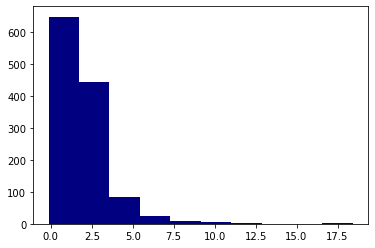

In [630]:
plt.hist(grouped_2021['Profit'], color='#000080')

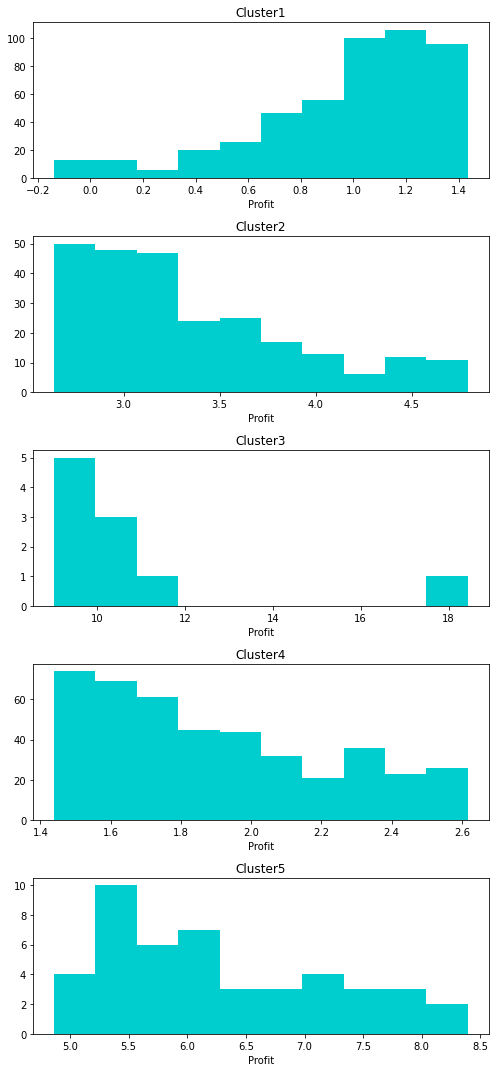

In [629]:
fig, ax = plt.subplots(5, figsize=(7,15))
for i in range(5):    
    ax[i].set(xlabel='Profit', title='Cluster{}'.format(i+1))
    ax[i].hist(grouped_2021[grouped_2021['Cluster']==i]['Profit'], color='#00CDCD')
plt.tight_layout()